(1) ACF를 사용해서 distance를 계산하시오

In [23]:
import pandas as pd
import numpy as np
data=pd.read_csv("서울특별시 코로나19.csv")
data.head()

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


In [24]:
data=data.drop(columns=['날짜'])
data

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,37261,33753,55376,81018,96008,95433,103288,116862,75118,82254,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,36216,32835,53872,79030,93474,92993,100255,113609,72934,79677,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,35276,31878,52391,76802,91030,90277,97419,110583,70754,77878,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,34879,31577,51652,76108,89876,89302,96359,109500,70003,76542,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,34061,30903,50720,74178,87770,87345,93690,106437,68329,75119,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,3,0,0,0,0,0,1,2,0,0,...,1,0,0,0,0,0,0,0,1,0


In [25]:
len(data)

785

In [26]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags=n_lags)
n_lags=785
lag_arr=np.repeat(n_lags, data.shape[1])
acf_list=list(map(acf, data.transpose().to_numpy(), lag_arr))
acf_df=pd.DataFrame(acf_list).transpose()
acf_df.columns=data.columns

acf_df.head()

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965624,0.966025,0.965807,0.964843,0.965118,0.966179,0.964429,0.964386,0.964873,0.964677,...,0.963102,0.964896,0.964495,0.964211,0.964682,0.964599,0.964920,0.965594,0.965216,0.964788
2,0.932172,0.932933,0.932148,0.930035,0.930705,0.932781,0.929547,0.929349,0.930425,0.930168,...,0.927079,0.930870,0.929726,0.929708,0.930160,0.930349,0.931073,0.931913,0.930854,0.930000
3,0.899077,0.900435,0.899075,0.895739,0.896734,0.900063,0.895251,0.894822,0.896665,0.895849,...,0.891603,0.897198,0.895662,0.895164,0.895834,0.896316,0.897017,0.898790,0.897147,0.895648
4,0.865542,0.867391,0.865682,0.860691,0.862274,0.866781,0.860302,0.859554,0.862291,0.861332,...,0.855502,0.862796,0.860914,0.860051,0.860964,0.861660,0.863028,0.865697,0.862857,0.861294


In [27]:
acf_df=acf_df.T
acf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
종로구,1.0,0.965624,0.932172,0.899077,0.865542,0.832363,0.794512,0.761958,0.729971,0.699409,...,-0.032352,-0.029599,-0.026741,-0.023738,-0.020635,-0.017175,-0.013889,-0.010519,-0.007108,-0.003608
중구,1.0,0.966025,0.932933,0.900435,0.867391,0.834610,0.796898,0.764614,0.733020,0.702617,...,-0.032460,-0.029706,-0.026830,-0.023818,-0.020699,-0.017212,-0.013915,-0.010542,-0.007135,-0.003619
용산구,1.0,0.965807,0.932148,0.899075,0.865682,0.832234,0.798381,0.765454,0.733336,0.702647,...,-0.032290,-0.029516,-0.026637,-0.023616,-0.020484,-0.017232,-0.013929,-0.010562,-0.007144,-0.003624
성동구,1.0,0.964843,0.930035,0.895739,0.860691,0.826010,0.789577,0.755252,0.721447,0.689063,...,-0.028496,-0.026046,-0.023505,-0.020839,-0.018086,-0.015171,-0.012270,-0.009290,-0.006282,-0.003182
광진구,1.0,0.965118,0.930705,0.896734,0.862274,0.828063,0.793461,0.759914,0.727410,0.696133,...,-0.028500,-0.026029,-0.023499,-0.020853,-0.018098,-0.015231,-0.012320,-0.009335,-0.006309,-0.003199


(2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오

In [30]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NGULIM.TTF"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

In [31]:
acf_df.index

Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object')

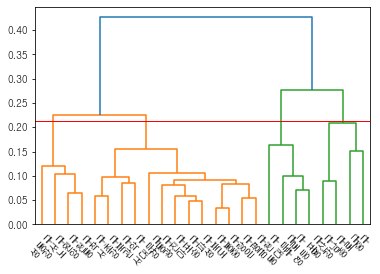

In [39]:
label=acf_df.index
dend1=sch.linkage(acf_df, method='average')
cutoff=0.5*max(dend1[:,2])
plt.axhline(y=cutoff, color='r', linewidth=1)
dend_res1=sch.dendrogram(dend1, labels=label)
plt.show()

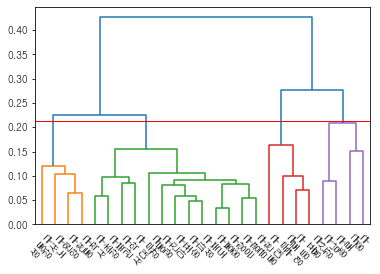

In [43]:
label=acf_df.index
dend1=sch.linkage(acf_df, method='average')
cutoff=0.5*max(dend1[:,2])
plt.axhline(y=cutoff, color='r', linewidth=1)
dend_res1=sch.dendrogram(dend1, color_threshold=cutoff, labels=label)
plt.show()

임곗값(cut-off)를 linkage matrix 3번쨰열의 최댓값의 0.5%로 설정했다. 군집이 4개로 나뉘는 것을 확인할 수 있다.